In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [95]:
df=pd.read_csv('https://raw.githubusercontent.com/slidescope/data/master/odicricket.csv')
df

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
0,Australia,240,1,50.0,4.80,6 Jan 1985,lost,West Indies,Melbourne
1,West Indies,241,2,44.5,5.37,6 Jan 1985,won,Australia,Melbourne
2,Sri Lanka,239,1,49.0,4.87,8 Jan 1985,lost,Australia,Sydney
3,Australia,240,2,46.2,5.17,8 Jan 1985,won,Sri Lanka,Sydney
4,Sri Lanka,197,1,50.0,3.94,10 Jan 1985,lost,West Indies,Hobart
...,...,...,...,...,...,...,...,...,...
7597,Zimbabwe,218,2,37.3,5.81,6 Mar 2020,lost,Bangladesh,Sylhet
7598,Australia,254,1,50.0,5.08,7 Mar 2020,lost,South Africa,Potchefstroom
7599,South Africa,258,2,45.3,5.67,7 Mar 2020,won,Australia,Potchefstroom
7600,Australia,258,1,50.0,5.16,13 Mar 2020,won,New Zealand,Sydney


# EDA

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 9 columns):
team1     7602 non-null object
runs      7602 non-null int64
Inn       7602 non-null int64
overs     7602 non-null float64
rpo       7602 non-null float64
Date      7602 non-null object
result    7602 non-null object
team2     7602 non-null object
Ground    7602 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 534.6+ KB


In [97]:
df.describe()

,runs,Inn,overs,rpo
count,7602.000000,7602.000000,7602.000000,7602.000000
mean,219.877927,1.500000,44.785057,4.905963
std,60.789866,0.500033,7.718425,1.096836
min,35.000000,1.000000,4.200000,1.680000
25%,179.000000,1.000000,42.400000,4.160000
50%,221.000000,1.500000,48.300000,4.850000
75%,259.000000,2.000000,50.000000,5.560000
max,481.000000,2.000000,55.000000,15.830000


In [98]:
df.isnull().sum() # for any Nan valuse

team1     0
runs      0
Inn       0
overs     0
rpo       0
Date      0
result    0
team2     0
Ground    0
dtype: int64

In [99]:
df.Ground.value_counts()

Sharjah           470
Dhaka             328
Harare            308
Colombo (RPS)     242
Sydney            234
                 ... 
Amritsar            2
Bready              2
Nairobi (Club)      2
Albion              2
Vijayawada          2
Name: Ground, Length: 175, dtype: int64

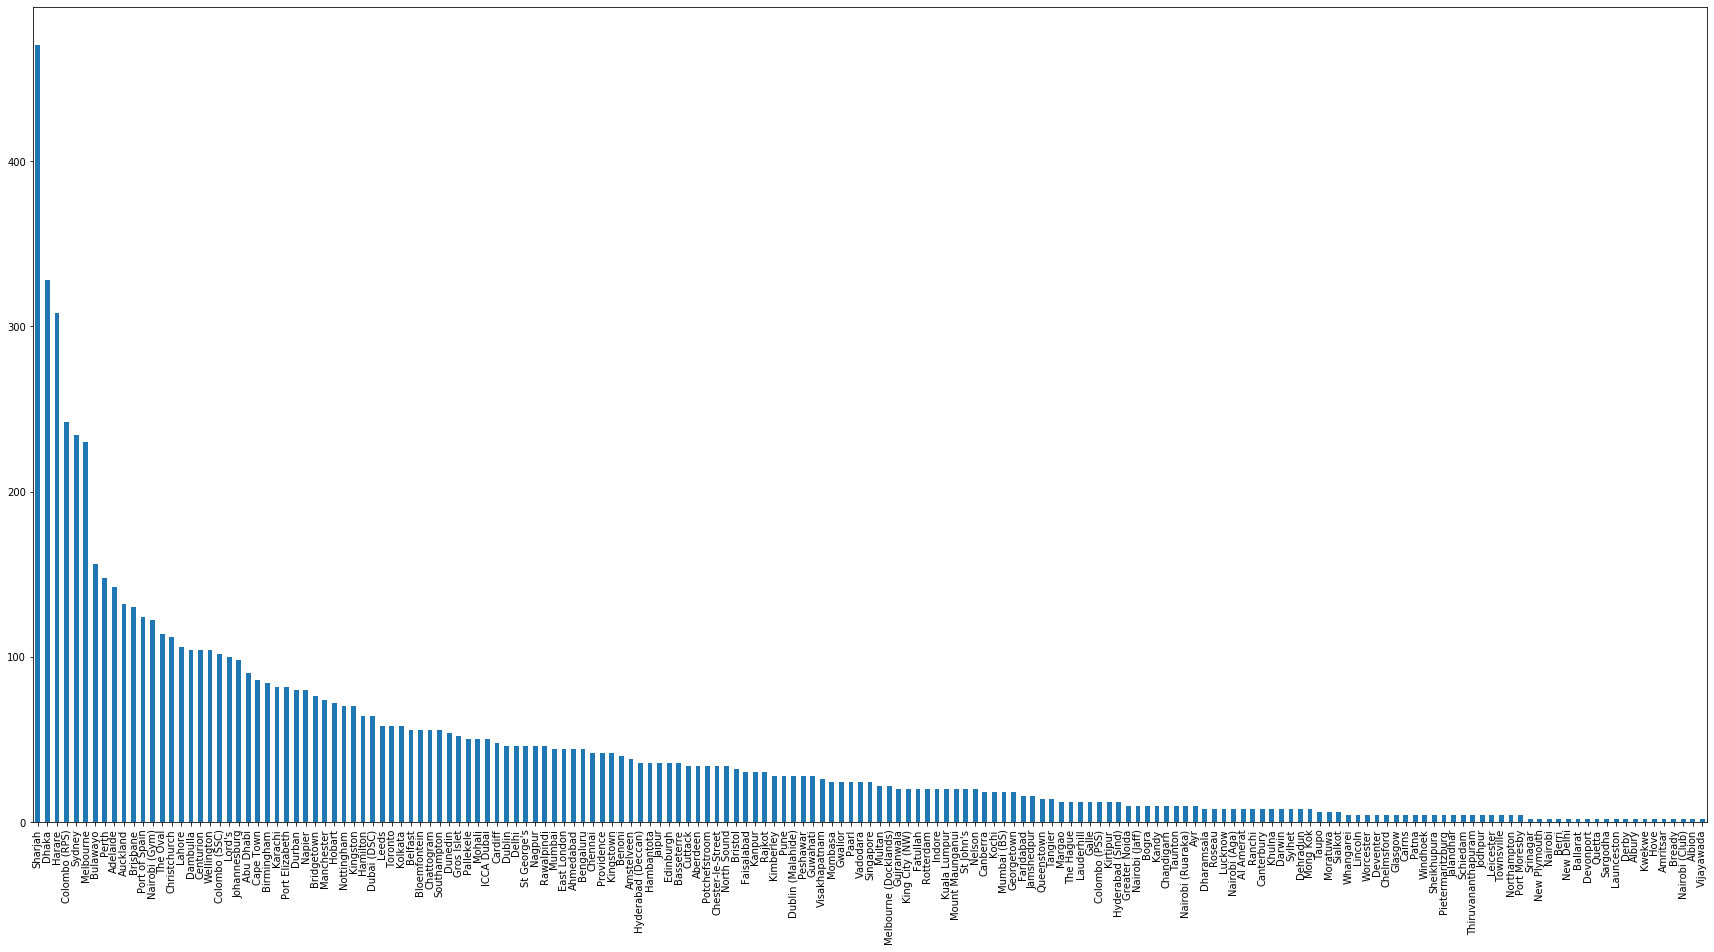

In [100]:
df.Ground.value_counts().plot(kind="bar",figsize=[30,15]) # most of the match played at Sharjah,dhaka..etc


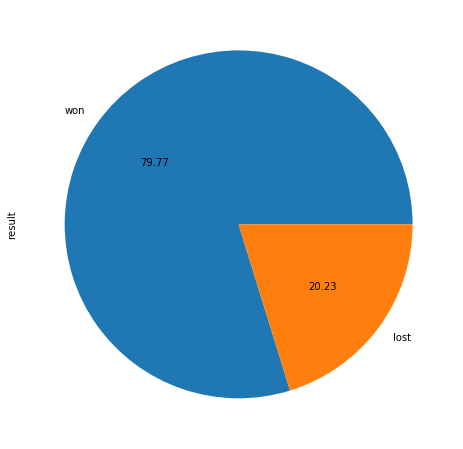

In [101]:
df[df.runs>300].result.value_counts().plot(kind='pie',figsize=[8,8],autopct="%.2f") # 300 and above is safe score to win the macth.

In [102]:
df['team1']=df['team1'].astype('category') 
df['team2']=df['team2'].astype('category')
df['result']=df['result'].astype('category')
df['Ground']=df['Ground'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 9 columns):
team1     7602 non-null category
runs      7602 non-null int64
Inn       7602 non-null int64
overs     7602 non-null float64
rpo       7602 non-null float64
Date      7602 non-null object
result    7602 non-null category
team2     7602 non-null category
Ground    7602 non-null category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 343.6+ KB
None


In [103]:
df[df['result']=="won"]

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
1,West Indies,241,2,44.5,5.37,6 Jan 1985,won,Australia,Melbourne
3,Australia,240,2,46.2,5.17,8 Jan 1985,won,Sri Lanka,Sydney
5,West Indies,198,2,40.4,4.86,10 Jan 1985,won,Sri Lanka,Hobart
6,New Zealand,277,1,50.0,5.54,12 Jan 1985,won,Pakistan,Napier
8,West Indies,270,1,50.0,5.40,12 Jan 1985,won,Sri Lanka,Brisbane
...,...,...,...,...,...,...,...,...,...
7592,Bangladesh,322,1,50.0,6.44,3 Mar 2020,won,Zimbabwe,Sylhet
7595,South Africa,274,2,48.3,5.64,4 Mar 2020,won,Australia,Bloemfontein
7596,Bangladesh,322,1,43.0,7.48,6 Mar 2020,won,Zimbabwe,Sylhet
7599,South Africa,258,2,45.3,5.67,7 Mar 2020,won,Australia,Potchefstroom


In [104]:
df[df['runs']>400] #only two matches in which score is above 400 are lost . Above 400 score is very good position to win a match for a team.

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
3972,Australia,434,1,50.0,8.68,12 Mar 2006,lost,South Africa,Johannesburg
3973,South Africa,438,2,49.5,8.78,12 Mar 2006,won,Australia,Johannesburg
4050,Sri Lanka,443,1,50.0,8.86,4 Jul 2006,won,Netherlands,Amstelveen
4102,South Africa,418,1,50.0,8.36,20 Sep 2006,won,Zimbabwe,Potchefstroom
4338,India,413,1,50.0,8.26,19 Mar 2007,won,Bermuda,Port of Spain
4690,New Zealand,402,1,50.0,8.04,1 Jul 2008,won,Ireland,Aberdeen
5078,India,414,1,50.0,8.28,15 Dec 2009,won,Sri Lanka,Rajkot
5079,Sri Lanka,411,2,50.0,8.22,15 Dec 2009,lost,India,Rajkot
5134,India,401,1,50.0,8.02,24 Feb 2010,won,South Africa,Gwalior
5642,India,418,1,50.0,8.36,8 Dec 2011,won,West Indies,Indore


In [105]:
df.corr()

,runs,Inn,overs,rpo
runs,1.000000,-0.279765,0.647188,0.700214
Inn,-0.279765,1.000000,-0.384142,-0.023092
overs,0.647188,-0.384142,1.000000,-0.049881
rpo,0.700214,-0.023092,-0.049881,1.000000


In [106]:
df=df.drop(columns=['Date','Inn','team1','team2','Ground'])
df

,runs,overs,rpo,result
0,240,50.0,4.80,lost
1,241,44.5,5.37,won
2,239,49.0,4.87,lost
3,240,46.2,5.17,won
4,197,50.0,3.94,lost
...,...,...,...,...
7597,218,37.3,5.81,lost
7598,254,50.0,5.08,lost
7599,258,45.3,5.67,won
7600,258,50.0,5.16,won


In [115]:
df=pd.get_dummies(df)
df

,runs,overs,rpo,result_lost,result_won
0,240,50.0,4.80,1,0
1,241,44.5,5.37,0,1
2,239,49.0,4.87,1,0
3,240,46.2,5.17,0,1
4,197,50.0,3.94,1,0
...,...,...,...,...,...
7597,218,37.3,5.81,1,0
7598,254,50.0,5.08,1,0
7599,258,45.3,5.67,0,1
7600,258,50.0,5.16,0,1


In [117]:
df.drop('result_lost',axis=1)

,runs,overs,rpo,result_won
0,240,50.0,4.80,0
1,241,44.5,5.37,1
2,239,49.0,4.87,0
3,240,46.2,5.17,1
4,197,50.0,3.94,0
...,...,...,...,...
7597,218,37.3,5.81,0
7598,254,50.0,5.08,0
7599,258,45.3,5.67,1
7600,258,50.0,5.16,1


# logistic regression

In [123]:
X=df.iloc[:,0:3]
y=df.iloc[:,4]



In [194]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51) # 70% training and 30% testing data.

from sklearn.preprocessing import StandardScaler # to change at same level
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [198]:
logit = LogisticRegression(random_state=44)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
y_pred

C:\Users\RAKA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [204]:
# for accuracy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred ) )
print(accuracy_score(y_test, y_pred) )
print(roc_auc_score(y_test, y_pred))

[[803 305]
 [487 686]]
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1108
           1       0.69      0.58      0.63      1173

    accuracy                           0.65      2281
   macro avg       0.66      0.65      0.65      2281
weighted avg       0.66      0.65      0.65      2281

0.6527838667251206
0.6547772381594295


# DecisionTreeClassifier

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.6048652202498357


In [202]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[803 305]
 [487 686]]
Accuracy: 0.6527838667251206


---- logistic model is more accurate than naive bayes and decision tree model.